In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy import stats

In [74]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(15,9)})

# Use dark background for figures
#import matplotlib.pyplot as plt
#plt.style.use("dark_background")

In [226]:
def plot_histogram(data, xlabel='', 
                   linewith=1, alpha=0.5, bins=100, kde=False, norm_hist=True, 
                   color='skyblue'
                  ):
    ax = sns.distplot(data,
                      norm_hist=norm_hist,
                      bins=bins,
                      kde=kde,
                      color=color,
                      hist_kws={"linewidth": linewith,'alpha':alpha})
    ax.set(xlabel=xlabel, ylabel='Frequency')
    
    

In [86]:
n = 10000
a = 0
b = 10

data_uniform = stats.uniform.rvs(size=n, loc = a, scale=b)
data_normal = stats.norm.rvs(size=10000,n=0,scale=1)

In [112]:
# 2 cases: fraud and non fraud
# Generate one for classified positives and one for classified negatives.
# For each of those, randomly assign a % of them as class 1, with the right skewed one with a greater probability.
import uuid
import random

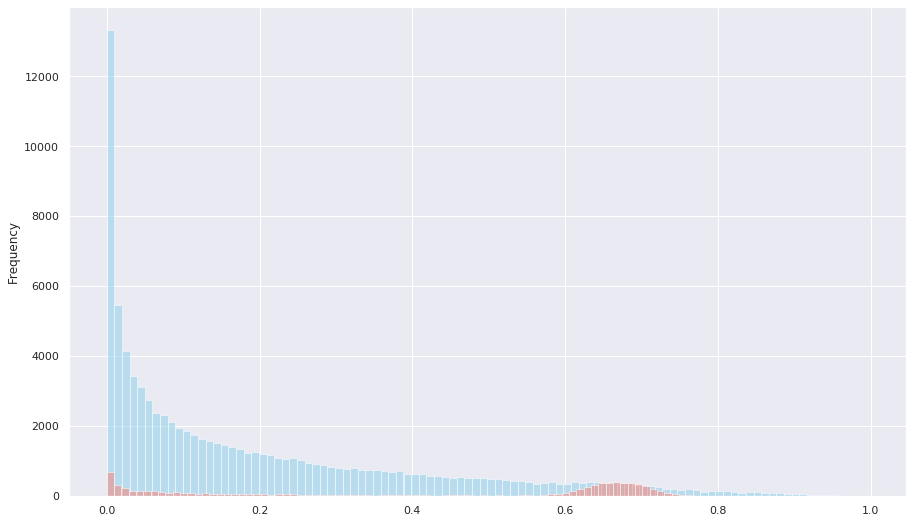

In [258]:
n = 100e3
n = int(n)
lSkew = 0.95

lSkewLabel = 0.05
rSkewLabel = 0.80

lSkewDist = lambda n : stats.beta.rvs(0.5, 2, size=n)
rSkewDist = lambda n : stats.beta.rvs(100, 50, size=n)

df = pd.DataFrame([], columns=['uuid', 'skew', 'score', 'label'])

df['uuid'] = [str(uuid.uuid4()) for _ in range(n)]

df['skew'] = ['l' if random.uniform(0,1) < lSkew else 'r' for _ in range(n)]

df.loc[df['skew'] == 'l', 'label'] = [1 if random.uniform(0,1) < lSkewLabel else 0 for _ in range(len(df[df['skew'] == 'l']))]
df.loc[df['skew'] == 'r', 'label'] = [1 if random.uniform(0,1) < rSkewLabel else 0 for _ in range(len(df[df['skew'] == 'r']))]

df.loc[df['skew'] == 'l', 'score'] = lSkewDist(len(df[df['skew'] == 'l']))
df.loc[df['skew'] == 'r', 'score'] = rSkewDist(len(df[df['skew'] == 'r']))

plot_histogram(df[df['label'] == 0]['score'], color='skyblue', norm_hist=False)
plot_histogram(df[df['label'] == 1]['score'], color='salmon' , norm_hist=False)

In [248]:
df['label'].value_counts()

0    91231
1     8769
Name: label, dtype: int64

In [259]:
df

,uuid,skew,score,label
0,28cb37ec-4ef1-491e-adb7-ba5c9a13edb2,l,0.150006,0
1,b9169c1e-add6-44a0-8ae5-3cf62041c747,l,0.621599,0
2,dba7880f-065c-42be-aa6b-d2fa62ce1ca7,l,0.208871,0
3,f4beae95-bb7e-4d4f-8150-c097202dcfb4,l,0.0168322,0
4,80dc36c8-a505-4a9d-b7b2-b16f48a837ec,l,0.129061,0
5,4c4e6ed6-9139-4fab-a4a4-04bebb16f590,l,0.0364323,0
6,fdbbe792-f62b-46a5-a2af-2cd73fb72c0d,l,0.00747427,0
7,94b55e4d-b651-4517-8259-ab6537dfd6ff,l,0.0921088,1
8,aeb3a8fe-5a32-4c80-877b-398cf3506578,l,0.0394406,0
9,6b58b4f2-443b-4899-89dd-517d0c1fb190,l,0.0821826,0


In [274]:
def gen_subgroup(group, n = 1000, conf={}):
    n = int(n)
    
    lSkew = 0.95 if 'lSkew' not in conf.keys() else conf['lSkew']
    lSkewLabel = 0.05 if 'lSkewLabel' not in conf.keys() else conf['lSkewLabel']
    rSkewLabel = 0.80 if 'rSkewLabel' not in conf.keys() else conf['rSkewLabel']
    lSkewDist = lambda n : stats.beta.rvs(0.5,  2, size=n) if 'lSkewDist' not in conf.keys() else conf['lSkewDist']
    rSkewDist = lambda n : stats.beta.rvs(100, 50, size=n) if 'rSkewDist' not in conf.keys() else conf['rSkewDist']

    df = pd.DataFrame([], columns=['uuid', 'group', 'skew', 'score', 'label'])
    
    df['uuid'] = [str(uuid.uuid4()) for _ in range(n)]

    df['group'] = group
    
    df['skew'] = ['l' if random.uniform(0,1) < lSkew else 'r' for _ in range(n)]

    df.loc[df['skew'] == 'l', 'label'] = [1 if random.uniform(0,1) < lSkewLabel else 0 for _ in range(len(df[df['skew'] == 'l']))]
    df.loc[df['skew'] == 'r', 'label'] = [1 if random.uniform(0,1) < rSkewLabel else 0 for _ in range(len(df[df['skew'] == 'r']))]

    df.loc[df['skew'] == 'l', 'score'] = lSkewDist(len(df[df['skew'] == 'l']))
    df.loc[df['skew'] == 'r', 'score'] = rSkewDist(len(df[df['skew'] == 'r']))
    
    return df

    

In [289]:
df = gen_subgroup("Group 1", n=5000)
df = df.append(gen_subgroup("Group 2", n=1000))
df = df.append(gen_subgroup("Group 3", n= 500))
df = df.append(gen_subgroup("Group 4", n=3000))
df["score"] = df["score"].apply(lambda x: "{:.2f}".format(x))

In [309]:
len(df[df["label"] == 1])

827

In [310]:
len(df[df["label"] == 1].index)

827

In [311]:
df[df["label"] == 1].shape[0]

827

In [ ]:
def get_stats(df, threshold)

In [313]:
df.head(10)

,uuid,group,skew,score,label
0,0cab325b-1af5-4c3b-813f-374b4f7389a3,Group 1,l,0.04,0
1,6d7da016-e6cf-4ab1-91ba-4463a3592f05,Group 1,l,0.87,0
2,3ed5ef57-f91d-4e77-b35c-afd65a2e64a1,Group 1,l,0.00,0
3,14742e5c-1244-4e78-9d4b-49a174112fd8,Group 1,l,0.00,0
4,2a568907-5a03-4888-af9b-347cc8387b74,Group 1,l,0.74,0
5,e8c6405c-785e-481d-a0d0-4319cc618bb2,Group 1,l,0.03,0
6,e91b3748-2eb2-4a29-8904-14b9bdf1436c,Group 1,l,0.10,0
7,b8a10c63-af9b-45cb-b5be-2c2e2b78b67e,Group 1,l,0.07,0
8,c25a4c7e-b2e0-4cc9-a671-a26d80e26a7b,Group 1,l,0.66,0
9,c800f88a-fc71-48a7-a93e-b7de1e35975c,Group 1,l,0.25,0


In [337]:
df_score_bins = df.drop(columns=['skew']).groupby(["group", "score", "label"]).count().reset_index()
df_score_bins['score'] = df_score_bins['score'].apply(lambda x: float(x))

In [391]:
def get_stats(df, threshold):
    stats = {}
    
    stats["threshold"] = threshold
    
    stats['n'] = df['uuid'].sum()
    stats['positives'] = df[(df["label"] == 1)]['uuid'].sum()
    stats['negatives'] = df[(df["label"] == 0)]['uuid'].sum()
    
    stats['tp'] = df[(df["score"] >= threshold) & (df["label"] == 1)]['uuid'].sum()
    stats['tn'] = df[(df["score"]  < threshold) & (df["label"] == 0)]['uuid'].sum()
    stats['fp'] = df[(df["score"] >= threshold) & (df["label"] == 0)]['uuid'].sum()
    stats['fn'] = df[(df["score"]  < threshold) & (df["label"] == 1)]['uuid'].sum()
    
    stats["recall"] = stats['tp'] / stats["positives"]
    stats["alerts"] = stats['tp'] + stats['fp']
    
    return stats
    
    

In [392]:
df1 = df_score_bins[df_score_bins["group"] == 'Group 1']

In [393]:
get_stats(df1, 0.2)

{'alerts': 2021,
 'fn': 143,
 'fp': 1739,
 'n': 5000,
 'negatives': 4575,
 'positives': 425,
 'recall': 0.6635294117647059,
 'threshold': 0.2,
 'tn': 2836,
 'tp': 282}

In [394]:
df_recall_per_threshold = pd.DataFrame(columns=["threshold"])
df_recall_per_threshold.threshold = np.linspace(0,1,101)

In [395]:
df_recall_per_threshold["recall"] = df_recall_per_threshold.threshold.apply(lambda x: get_stats(df_score_bins[df_score_bins["group"] == 'Group 1'], x)['recall'])
df_recall_per_threshold["alerts"] = df_recall_per_threshold.threshold.apply(lambda x: get_stats(df_score_bins[df_score_bins["group"] == 'Group 1'], x)['alerts'])

In [397]:
df_recall_per_threshold.head(25)

,threshold,recall,alerts
0,0.00,1.000000,5000
1,0.01,0.957647,4525
2,0.02,0.910588,4160
3,0.03,0.884706,3902
4,0.04,0.842353,3677
5,0.05,0.828235,3485
6,0.06,0.814118,3334
7,0.07,0.788235,3184
8,0.08,0.781176,3061
9,0.09,0.752941,2951
